In [2]:
import fxcmpy

con = fxcmpy.fxcmpy(config_file='fxcm.cfg')
print(con.get_candles('EUR/USD', period='m1', number=3))

con.close()


|WARNING|2023-01-19 23:01:22,474|Default account set to 1342146, to change use set_default_account().


                     bidopen  bidclose  bidhigh   bidlow  askopen  askclose  \
date                                                                          
2023-01-19 21:58:00  1.08305   1.08304  1.08311  1.08296  1.08313   1.08315   
2023-01-19 21:59:00  1.08303   1.08307  1.08307  1.08264  1.08315   1.08349   
2023-01-19 22:00:00  1.08306   1.08273  1.08317  1.08273  1.08349   1.08347   

                     askhigh   asklow  tickqty  
date                                            
2023-01-19 21:58:00  1.08320  1.08307       86  
2023-01-19 21:59:00  1.08369  1.08300      152  
2023-01-19 22:00:00  1.08383  1.08347       10  


In [1]:
import fxcmpy
print(fxcmpy.__version__)

1.3.3


### get_candles

In [3]:
import kragle.kdb as kdb
import datetime as dt
import pprint as pp

date_start = dt.datetime(2020, 1, 22, 23, 50)
date_end = dt.datetime(2020, 1, 22, 23, 59)

db = kdb.KragleDB('FX_2020_GEN_22')
v = db.get_candles('EUR/USD', 'm5', date_end, 2)
pp.pprint(v)

[{'askclose': 1.10961,
  'askhigh': 1.10964,
  'asklow': 1.1095,
  'askopen': 1.1095,
  'bidclose': 1.10955,
  'bidhigh': 1.10958,
  'bidlow': 1.10944,
  'bidopen': 1.10945,
  'date': datetime.datetime(2020, 1, 22, 23, 55),
  'tickqty': 283},
 {'_id': ObjectId('63cb33c63a25a7383d77475d'),
  'askclose': 1.1095,
  'askhigh': 1.10958,
  'asklow': 1.10947,
  'askopen': 1.10948,
  'bidclose': 1.10945,
  'bidhigh': 1.10952,
  'bidlow': 1.10939,
  'bidopen': 1.10942,
  'date': datetime.datetime(2020, 1, 22, 23, 50),
  'tickqty': 164}]


### calc_mean_stddev

In [2]:
import kragle.kdb as kdb
import datetime as dt
import pprint as pp

date_start = dt.datetime(2021, 1, 1)
date_end = dt.datetime(2021, 5, 31,)

db = kdb.KragleDB('FX_2020_2021')
v = db.calc_mean_stddev('EUR/USD', 'm1', date_start, date_end)
pp.pprint(v)

{'bidopen-mean': 0.00011594279860246181,
 'bidopen-stddev': 0.8242580674716756,
 'tickqty-mean': 0.40272353284787743,
 'tickqty-stddev': 0.3762696817328249}


### get_sample

In [1]:
import kragle.kdb as kdb
import datetime as dt
import pprint as pp

date_end = dt.datetime(2021, 1, 5, 14, 57)

db = kdb.KragleDB('FX_2020_2021')
v = db.get_sample(to_date = date_end, n= 5)
pp.pprint(v)

{'date': datetime.datetime(2021, 1, 5, 14, 57),
 'x': [[[1.4999999999998348, 1.1525],
        [-1.9999999999997797, 1.1425],
        [-0.5999999999994898, 0.765],
        [-2.100000000000435, 1.115],
        [-0.2999999999997449, 0.92]],
       [[-0.8666666666664232, 1.0075],
        [-1.1333333333333566, 1.352],
        [-0.3000000000004851, 1.7275],
        [-0.23333333333338166, 1.8015],
        [-0.4666666666660232, 1.331]],
       [[1.4666666666665051, 0.6108333333333333],
        [-0.8133333333333326, 0.873],
        [-0.5199999999998539, 0.6958333333333333],
        [0.10666666666647728, 0.7219166666666667],
        [-1.5333333333333126, 0.6241666666666666]],
       [[-1.3800000000000108, 0.874475],
        [0.7199999999999799, 0.60045],
        [0.9333333333333785, 0.865125],
        [-0.9266666666666682, 0.54995],
        [-0.04666666666667633, 0.35945]],
       [[-0.3266666666666603, 0.7225],
        [0.963333333333353, 0.3125875],
        [-1.8566666666666916, 0.84705625],
 

### duplicate_db

In [4]:
import kragle.kdb as kdb
import datetime as dt
import kragle.utils as kutils

date_start = dt.datetime(2020, 1, 22)
date_end = dt.datetime(2020, 1, 23)

dbname = 'FX_2020_GEN_22'
db = kdb.KragleDB('FX_RAW')
olddb = kdb.KragleDB(dbname)
olddb.drop_db()
newdb = db.duplicate_db(dbname, from_date=date_start, to_date=date_end, fields=kutils.FIELDS)
newdb.get_periods('EUR/USD')

['H8', 'H2', 'm1', 'D1', 'm5', 'm30']

## Create Dataset

In [3]:
import kragle.kdb as kdb
import datetime as dt
import pprint as pp

from_date = dt.datetime(2020, 2, 1)
to_date = dt.datetime(2021, 12, 20)
periods=['m1', 'm5', 'm30', 'H2', 'H8', 'D1']
db = kdb.KragleDB('FX_2020_2021')
db.create_dataset('pips12', 9100, from_date, to_date, instrument='EUR/USD',
                  periods=periods, history_len=10, pips=12, limit_future=180,distribution=[0.75, 0.2, 0.05], drop=True)
print('END')


Dataset len: 50	/	9100
Dataset len: 50	/	9100
Dataset len: 50	/	9100
Dataset len: 100	/	9100
Dataset len: 100	/	9100
Dataset len: 100	/	9100
Dataset len: 150	/	9100
Dataset len: 150	/	9100
Dataset len: 200	/	9100
Dataset len: 250	/	9100
Dataset len: 300	/	9100
Dataset len: 300	/	9100
Dataset len: 350	/	9100
Dataset len: 400	/	9100
Dataset len: 450	/	9100
Dataset len: 500	/	9100
Dataset len: 550	/	9100
Dataset len: 550	/	9100
Dataset len: 600	/	9100
Dataset len: 650	/	9100
Dataset len: 700	/	9100
Dataset len: 750	/	9100
Dataset len: 800	/	9100
Dataset len: 850	/	9100
Dataset len: 900	/	9100
Dataset len: 900	/	9100
Dataset len: 950	/	9100
Dataset len: 1000	/	9100
Dataset len: 1050	/	9100
Dataset len: 1100	/	9100
Dataset len: 1150	/	9100
Dataset len: 1200	/	9100
Dataset len: 1200	/	9100
Dataset len: 1250	/	9100
Dataset len: 1300	/	9100
Dataset len: 1350	/	9100
Dataset len: 1400	/	9100
Dataset len: 1450	/	9100
Dataset len: 1500	/	9100
Dataset len: 1500	/	9100
Dataset len: 1550	/	9100
Datas

In [17]:
import kragle.fxcm_utils as fxutils
import datetime as dt
import logging.config

logging.config.fileConfig('log.cfg')

start = dt.datetime(2015, 1, 1)
end = dt.datetime(2016, 1, 1)


m = fxutils.FxcmManager(dbname='FX_RAW')
m.fetch_instrument(start, end)
m.close()

print('END')


WARNING | Default account set to 1342146, to change use set_default_account().
END


### Tensorflow

In [21]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models


model = models.Sequential()
model.add(layers.Conv2D(32, (1, 3), activation='relu', input_shape=(6, 10, 2), padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
#model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 6, 10, 32)         224       
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 10, 32)         9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 10, 64)         18496     
                                                                 
 dropout_2 (Dropout)         (None, 6, 10, 64)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 10, 64)         36928     
                                                                 
 flatten_1 (Flatten)         (None, 3840)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

### Compiling Model

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'],
              run_eagerly=True)



### Training Model

In [23]:
history = model.fit(train_set, train_labels, epochs=40, validation_data=valid, class_weight={0:10, 1:1, 2:10})

Epoch 1/40
312/312 [==============================] - 19s 59ms/step - loss: 5.7532 - accuracy: 0.3379 - val_loss: 1.3861 - val_accuracy: 0.3460
Epoch 2/40
312/312 [==============================] - 18s 59ms/step - loss: 5.6008 - accuracy: 0.3586 - val_loss: 1.1710 - val_accuracy: 0.3640
Epoch 3/40
312/312 [==============================] - 18s 59ms/step - loss: 5.4334 - accuracy: 0.3859 - val_loss: 1.2338 - val_accuracy: 0.3684
Epoch 4/40
312/312 [==============================] - 19s 59ms/step - loss: 5.2226 - accuracy: 0.4175 - val_loss: 1.2279 - val_accuracy: 0.3702
Epoch 5/40
312/312 [==============================] - 19s 59ms/step - loss: 4.9018 - accuracy: 0.4592 - val_loss: 1.2419 - val_accuracy: 0.4024
Epoch 6/40
312/312 [==============================] - 19s 59ms/step - loss: 4.4923 - accuracy: 0.5009 - val_loss: 1.2426 - val_accuracy: 0.4097
Epoch 7/40
312/312 [==============================] - 19s 59ms/step - loss: 4.0043 - accuracy: 0.5515 - val_loss: 1.1367 - val_accuracy:

### Plotting Accuracy

22/22 - 0s - loss: 1.9103 - accuracy: 0.5768 - 303ms/epoch - 14ms/step
0.5768116116523743


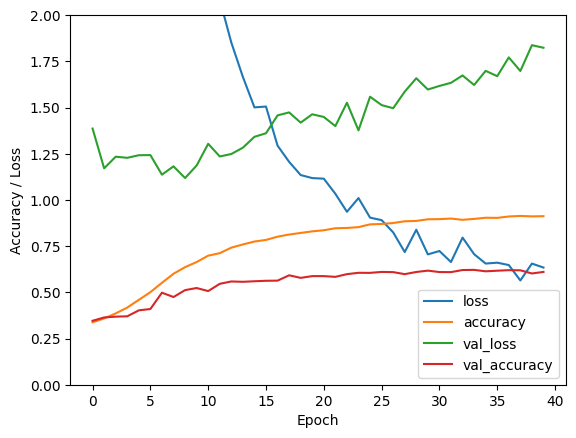

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test[0],  test[1], verbose=2)

print(test_acc)

In [15]:
print("Evaluate on test data")
results = model.predict(test_SELL[0])
for i in range(len(results)):
    print (round(results[i][0]), round(results[i][1]), round(results[i][2]),'<->' ,test_SELL[1][i])


Evaluate on test data
8/8 [==============================] - 0s 12ms/step
1 0 0 <-> 0
0 0 1 <-> 0
0 0 1 <-> 0
1 0 0 <-> 0
0 0 1 <-> 0
0 1 0 <-> 0
1 0 0 <-> 0
0 0 1 <-> 0
0 0 1 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
0 0 1 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
0 0 1 <-> 0
1 0 0 <-> 0
0 0 1 <-> 0
0 1 0 <-> 0
0 0 1 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
0 0 0 <-> 0
1 0 0 <-> 0
0 0 1 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
0 0 0 <-> 0
0 0 1 <-> 0
0 0 1 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
0 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
0 0 1 <-> 0
1 0 0 <-> 0
0 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
0 0 1 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
0 1 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
0 0 1 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
0 1 0 <-> 0
0 0 1 <-> 0
1 0 0 <-> 0
0 0 1 <-> 0
0 0 1 <-> 0
0 0 1 <-> 0
0 0 1 <-> 0
0 0 1 <-> 0
1 0 0 <-> 0
1 0 0 <-> 0
0 0 0 <-> 0
0 0 1 <-> 0
0 0 0 <-> 0
0 0 1 <-> 0
1 0 0 <-> 0
1 

In [27]:
print("Evaluate on test data on BUY")
results = model.evaluate(test_BUY[0],test_BUY[1])
print("test loss, test acc:", results)
print("Evaluate on test data on SELL")
results = model.evaluate(test_SELL[0],test_SELL[1])
print("test loss, test acc:", results)
print("Evaluate on test data on HOLD")
results = model.evaluate(test_HOLD[0],test_HOLD[1])
print("test loss, test acc:", results)


Evaluate on test data on BUY
7/7 [==============================] - 0s 14ms/step - loss: 1.8844 - accuracy: 0.5911
test loss, test acc: [1.8843879699707031, 0.5911329984664917]
Evaluate on test data on SELL
8/8 [==============================] - 0s 13ms/step - loss: 1.7793 - accuracy: 0.6388
test loss, test acc: [1.7793055772781372, 0.6387665271759033]
Evaluate on test data on HOLD
9/9 [==============================] - 0s 13ms/step - loss: 2.0448 - accuracy: 0.5115
test loss, test acc: [2.044830560684204, 0.5115384459495544]


In [10]:
import numpy

import kragle.kdb as kdb
import pprint as pp
db = kdb.KragleDB('Datasets')
(train_set, train_labels), valid, test = db.get_dataset(dataset_name='pips12')


In [11]:
print(len(train_labels))
print((train_labels))
    

9980
[2 2 2 ... 0 0 0]


In [3]:
import numpy

import kragle.kdb as kdb
import pprint as pp
db = kdb.KragleDB('Datasets')
test_SELL = db.get_dataset_bytype(dataset_name='pips12', nclass=-1)
test_HOLD = db.get_dataset_bytype(dataset_name='pips12', nclass=0)
test_BUY = db.get_dataset_bytype(dataset_name='pips12', nclass=1)


In [7]:
print(test_SELL[1])
print(test_HOLD[1])
print(test_BUY[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
[2 2 2 2 